In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [80]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

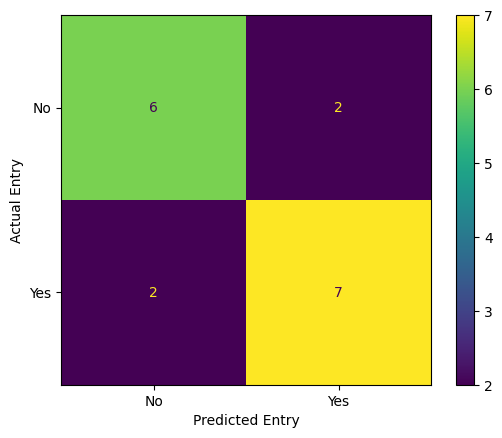

              precision    recall  f1-score   support

           N       0.75      0.75      0.75         8
           Y       0.78      0.78      0.78         9

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



[Text(0.3680555555555556, 0.9583333333333334, 'awayW <= 3.5\ngini = 0.491\nsamples = 127\nvalue = [55, 72]'),
 Text(0.1111111111111111, 0.875, 'Cumulative Win Rate <= 0.358\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.07407407407407407, 0.7916666666666666, 'Rookie <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.037037037037037035, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1111111111111111, 0.7083333333333334, 'Defensive Score <= 0.732\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.07407407407407407, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.625, 'awayW <= 2.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.1111111111111111, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.18518518518518517, 0.5416666666666666, 'confW <= 7.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.14814814814814814, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')

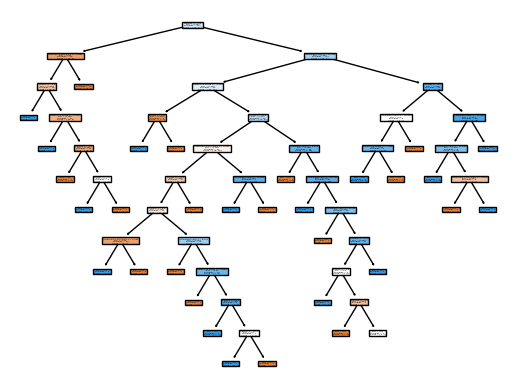

In [81]:
df_teams = pd.read_csv('dataset/processed/teams_test.csv')
df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)
#df_teams["confW"] = df_teams["confW"].fillna(0)
#df_teams = df_teams.fillna(-1)

label_encoder = LabelEncoder()
df_teams['playoff'] = label_encoder.fit_transform(df_teams['playoff'])

features = ['homeW', 'awayW', 'confW', 'playoff', 'Attacking Score', 'Defensive Score', 'Cumulative Win Rate', 'Rookie'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 8]
df_teams_test = df_teams[df_teams['year'].isin([9,10])]

# df_teams_train = df_teams[df_teams['year'] <= 5]
# df_teams_test = df_teams[df_teams['year'].isin([6])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())
dt_class.predict(testing_inputs)

dt_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, dt_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, dt_class)

plot_tree(dt_class, feature_names=features, filled=True)

[[0.33       0.67      ]
 [0.085      0.915     ]
 [0.12333333 0.87666667]
 [0.81       0.19      ]
 [0.76       0.24      ]
 [0.9        0.1       ]
 [0.95       0.05      ]
 [0.9        0.1       ]
 [0.81       0.19      ]
 [0.2        0.8       ]
 [0.69       0.31      ]
 [0.19       0.81      ]
 [0.675      0.325     ]
 [0.9        0.1       ]
 [0.1        0.9       ]
 [0.2575     0.7425    ]
 [0.05       0.95      ]
 [0.09       0.91      ]
 [0.04       0.96      ]
 [0.05       0.95      ]
 [0.88333333 0.11666667]
 [0.89       0.11      ]
 [0.81       0.19      ]
 [0.29       0.71      ]
 [0.17       0.83      ]
 [0.05       0.95      ]
 [0.19       0.81      ]
 [0.16       0.84      ]
 [0.02       0.98      ]
 [0.01       0.99      ]
 [0.09       0.91      ]
 [0.14       0.86      ]
 [0.75       0.25      ]
 [0.05       0.95      ]
 [0.18       0.82      ]
 [0.7        0.3       ]
 [0.78       0.22      ]
 [0.79       0.21      ]
 [0.3175     0.6825    ]
 [0.775      0.225     ]


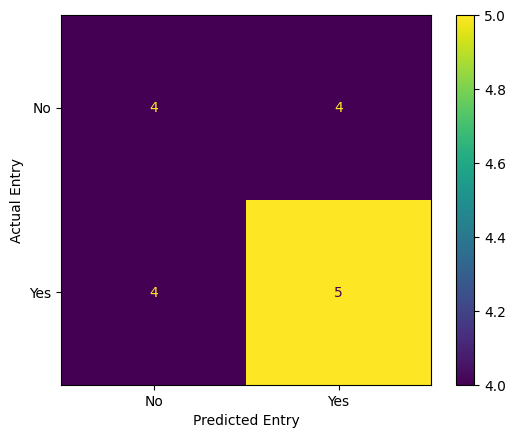

              precision    recall  f1-score   support

           N       0.50      0.50      0.50         8
           Y       0.56      0.56      0.56         9

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17



In [82]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

print(rf_class.predict_proba(training_inputs))

rf_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rf_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rf_class)

In [83]:
'''nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)'''

'nb_class = GaussianNB()\nnb_class.fit(training_inputs, training_classes)\n\nnb_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, nb_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, nb_class)'

In [84]:
'''svm_class = SVC(kernel='rbf')
svm_class.fit(training_inputs, training_classes)

svm_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, svm_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, svm_class)'''

"svm_class = SVC(kernel='rbf')\nsvm_class.fit(training_inputs, training_classes)\n\nsvm_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, svm_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, svm_class)"

In [85]:
'''knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)'''

'knn_class = KNeighborsClassifier(n_neighbors=5)\nknn_class.fit(training_inputs, training_classes)\n\nknn_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, knn_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, knn_class)'

In [86]:
'''ann_class = MLPClassifier(random_state=42, max_iter=300)
ann_class.fit(training_inputs, training_classes)

ann_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ann_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ann_class)'''

'ann_class = MLPClassifier(random_state=42, max_iter=300)\nann_class.fit(training_inputs, training_classes)\n\nann_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ann_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ann_class)'

In [87]:
'''ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ab_class.fit(training_inputs, training_classes)

ab_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ab_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ab_class)'''

'ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)\nab_class.fit(training_inputs, training_classes)\n\nab_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ab_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ab_class)'

In [88]:
'''for w in df_teams['confW']:
    print(w)
nan_count = df_teams['confW'].isna().sum()
print(nan_count)'''

#print(df_teams.isna().sum())

#df_teams.head(164)

df_teams_test.head(10)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,awayL,confW,confL,min,Attacking Score,Defensive Score,coachID,Cumulative Win Rate,Rookie,playoffNextYear
0,9,ATL,ATL,EA,7,0,NaN,NaN,NaN,Atlanta Dream,...,14,2,18,6825,NaN,NaN,meadoma99w,NaN,True,Y
12,9,CHI,CHI,EA,5,0,NaN,NaN,NaN,Chicago Sky,...,13,10,10,6875,10.634197,3.499492,keyst99wc,NaN,True,N
23,9,CON,CON,EA,2,1,L,NaN,NaN,Connecticut Sun,...,9,13,7,6850,14.176532,0.658518,thibami99w,0.576726,False,N
34,9,DET,DET,EA,1,1,W,W,W,Detroit Shock,...,9,16,4,6875,15.557675,0.277947,laimbbi01w,0.652222,False,Y
35,10,DET,DET,EA,3,1,W,L,NaN,Detroit Shock,...,10,11,11,6975,11.426826,0.834123,laimbbi01w,0.667760,False,Y
54,9,IND,IND,EA,4,1,L,NaN,NaN,Indiana Fever,...,11,12,8,6950,15.445668,0.365440,dunnli99wc,0.432500,False,Y
67,9,LAS,LAS,WE,3,1,W,L,NaN,Los Angeles Sparks,...,9,12,8,7000,10.087155,3.063220,coopemi01w,0.417757,False,Y
82,9,MIN,MIN,WE,7,0,NaN,NaN,NaN,Minnesota Lynx,...,10,8,12,6900,12.438251,3.552953,zierddo99w,0.294118,False,N
93,9,NYL,NYL,EA,3,1,W,L,NaN,New York Liberty,...,9,11,9,6900,11.445218,0.449236,coylepa99w,0.436324,False,N
94,10,NYL,NYL,EA,7,0,NaN,NaN,NaN,New York Liberty,...,12,9,13,6900,14.168554,0.647889,coylepa99w,0.515897,False,N
